# Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Описание данных:
# Данные для первой части
Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

# Данные для второй части
Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез.

# Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
import numpy as np    
from scipy import stats as st
import seaborn as sns

#прочтем все файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')               



In [2]:
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.head(10))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
display(orders.head(10))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
# приведем значения в стодбце date к формату datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
display(orders.isna().sum()) # проверим есть ли пропуски в данных по столбцам
orders.duplicated().sum() #проверим есть ли дубликаты

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0

Вывод: датафрейм orders состоит из 1197 строк, дубликаты и пустоты отсутствуют. Формат в столбце date был заменен на корректный с типом datetime64.

In [8]:
display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# изменим формат столбца date на корректный 
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# проверим есть ли дубликаты в фрейме visitors 
visitors.duplicated().sum()

0

Вывод: датафрейм visitors состоит из 62 строк, дубликаты и пустоты отсутствуют. Формат в столбце date был заменен на корректный с типом datetime64.

In [11]:
# смотрим какие группы AB теста присутствуют в перечне
print(orders['group'].unique())

# находим количетво пользователей в каждой группе  по таблице с заказами
visitor_count_group_a = orders[orders['group'] == 'A']['group']
visitor_count_group_b = orders[orders['group'] == 'B']['group']
display(visitor_count_group_a.count())
display(visitor_count_group_b.count())

['B' 'A']


557

640

In [12]:
# проверяем нет ли одного и того же пользователя в двух гуппах
count_group = orders.groupby('visitorId')['group'].nunique()

count_group_2 = orders.loc[orders["group"]=="A", "visitorId"].isin(orders.loc[orders["group"]=="B", "visitorId"])

res = orders.drop(count_group_2[count_group_2].index)


print(count_group)
print(res.info())



visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1108 non-null   int64         
 1   visitorId      1108 non-null   int64         
 2   date           1108 non-null   datetime64[ns]
 3   revenue        1108 non-null   int64         
 4   group          1108 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 51.9+ KB
None


Вывод: в таблице orders присутствуют две исследуемые группы (A и B ), группа A состоит из 557 прльзователей, группа B - 640 пользователей. Проведен анализ на предмет наличия одних и тех же пользоватедей в двух группах одновременно. Действительно такие пользователи есть, в переменной res сохранена новая таблица, в которой исключены повторы.

In [13]:
#найдем минимальную и максимальные даты периода, за который производился анализ
print('минимальная дата', orders['date'].min())
print('максимальная дата', orders['date'].max())

минимальная дата 2019-08-01 00:00:00
максимальная дата 2019-08-31 00:00:00


Вывод: анализ данных проводился за месяц в период с 01.08.2019 по 31.08.2019

In [14]:
# узнаем максимальное количество пользователей за день за рассматриваемый период
print('максимальное количество пользователей за день', visitors['visitors'].max())

максимальное количество пользователей за день 770


# Общий вывод по предобработке данных

- в обеих таблицах (visitors и orders) была проведена замена типа данных в столбце date на корректный
- в таблице hypothesis названия столбцов были проведены к нижнему регистру
- проведена проверка на наличие дубликатов и пропусков в данных
- проанализировали какие группы присутствуют в таблице orders, количество пользователей в каждой группе, определили, что есть пользователи, которые присутствуют в обеих группах, задали переменную res, которая исключает таких пользователей
- определили период исследования ( с 01.08.2019 по 31.08.201)
- определили максимальное количсетво пользователей в день за рассматриваемый период.

# 1.1 Приоритизация гипотез

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [15]:

display(hypothesis.head(10))
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts'] 
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [16]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении фреймворка ICE наиболее перспективными гипотезами были:8,0,7,6. При применении фреймворка RICE наиболее перспективными становятся гипотезы 7,2,0,6. Гипотеза 7 перешла на первое место в фреймворке RICE в связи с тем, что параметр Reach в данной гипотезе максимальный - 10, для гипотезы 2 , параметр Reach также достаточно высокий - 8. В расчете RICE параметр Reach стоит в числителе, пoэтому существенно влияет на величину искомого значения, увеличивая его.

# Часть 2. Анализ A/B-теста

1. построение графика кумулятивной выручки по группам.

In [17]:
display(orders.head())
display(visitors.head())

# создадим датаврейм с уникальными парами значений, исключая дубликаты
datesGroups = orders[['date', 'group']].drop_duplicates()

#собираем агрегированнеы кумулятивные данные по дням о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объявляем переменную, которая будет образования путем соединения двух ранее созданных таблиц методом merge
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] # присваиваем столбцам нового фрейма понятные названия

display(cumulativeData.head(5)) 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<function matplotlib.pyplot.show(close=None, block=None)>

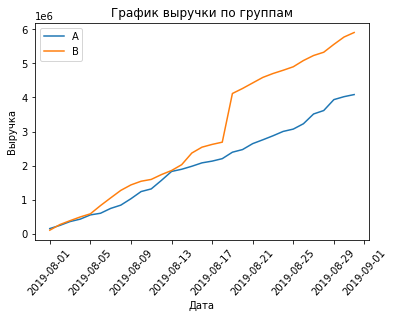

In [18]:
#построение графиков выручки по группам

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 48)
plt.title('График выручки по группам')
plt.show




Вывод: На всем рассматриваемом отрезке времени выручка по двум сегментам стабильно растет. Однако, менее чем в середине теста, выручка по сегменту B устойчиво начала опережать выручку по сегменту А. Так как на выручку влияет либо число заказов, либо уровень среднего чека, то можно говорить о том, что скачок выручки в сегменте B обусловлен либо существенным ростом относителльно сегмента А числа заказов, либо появления дорогих заказов в сегменте B по сравнению с сегментом А. 

2. построение графика кумулятивного среднего чека по группам. Сделайте выводы и предположения

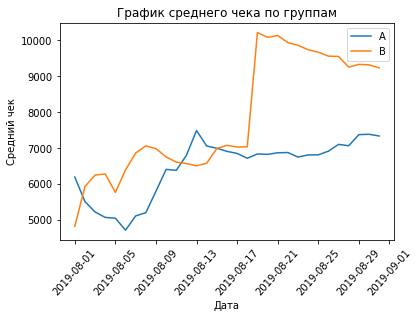

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation = 48)
plt.title('График среднего чека по группам')
plt.show()

Вывод: средний чек в каждом сегменте за рассматриваемый период растет. За вторую половину рассматриваемого периода коммудятивное значение среднего чека по каждому сегменту стабилизируется. Так же по графику видно, что в середине рассматриваемого периода есть очень большй скачок в сегменте B, возможно , он связан с появления числа очень дорогих заказов в данном сегменте. Очевидно, что по данной метрике принимать решение рано.

3. построение графика относительного изменения кумулятивного среднего чека группы B к группе A

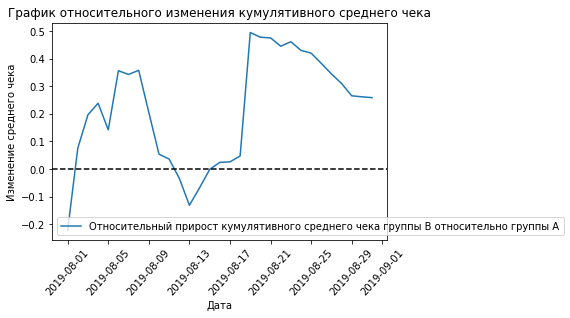

In [20]:
# собирем данные по двум ранее созданным таблицам в одном фрейме мтодом merge
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Относительный прирост кумулятивного среднего чека группы B относительно группы A")
plt.legend() 

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Изменение среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation = 48)
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

Вывод: есть промежутки на графике,где относительное изменение имеет серьезное колебания , нужно понять не являются ли причиной тому выбросы.

4. построение графика кумулятивного среднего количества заказов на посетителя по группам

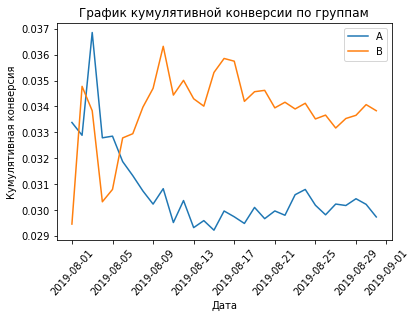

In [21]:
# зададим переменную для рассчета кумулятивной конверсии

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(rotation = 48)
plt.title('График кумулятивной конверсии по группам')
plt.show()

Вывод: в начале теста конферсия сегмента А имела большее значение, после ситуация изменилась. В целом конверсии по сегментам зафиксировались относительно одного значения и колебания относительно него не очень-то больше. ПРи этом, конвесия по сегменту В , чем по сегменту А.

5. построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

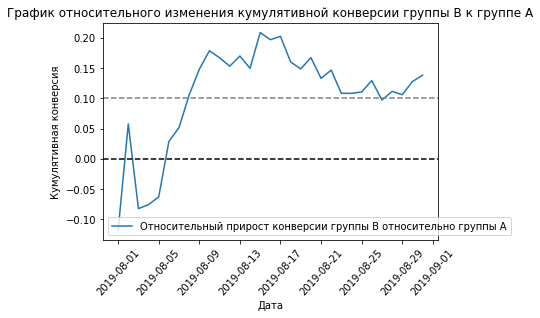

In [22]:
# задаем новую переменную и сохраняем в ней объединение таблицы cumulativeDataA и cumulativeDataB методом merge()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(rotation = 48)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()


Вывод: практически с самого начала теста конверсия по сегменту B лидирует. К концу рассматриваемого периода значительные колебания ушли и относительное изменение по показателю конверсия можно обозначить как около 10% прироста относительно сегмента А.

6. точечный график количества заказов по пользователям.

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


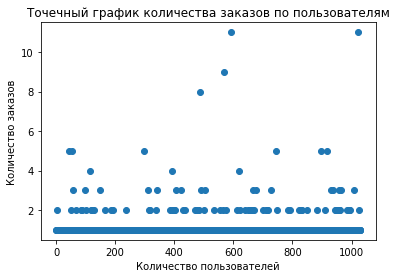

In [23]:
display(orders.head(10))

#задаем переменную 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
    
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by = 'orders', ascending = False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Вывод: По графику видно, что пользователей, которые сделали заказов более 3-х заказов не так много,возможно остальные заказы - юолее трех будут выбросами для того. Так же важно понять 3 заказа - это много ли мало, посчитаем перцентели. 

7. Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) # Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.

[2. 4.]


Вывод: метод показал, что не более 5% пользователей сделали заказ более 2-х раз и не более 1 % пользователей сделали заказ более 4-х раз. Логично выбрать максимальное количество заказов на одного пользователя не более 4, количество более 4-х заказов признать выбросами и отбросить.

8.точечный график стоимостей заказов.

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


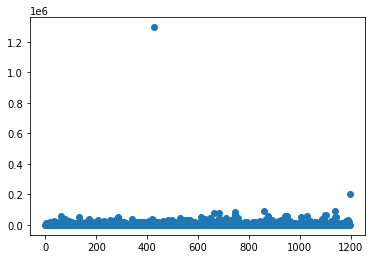

In [25]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])

Вывод: самым дорогим зказом является стал заказ по стоимости в 1 294 500. На втором месте по стоимсоти 202 740. Остальные заказы не превышали 94 000. Слишком дорогие заказы скорее являются выбросами- аномалиями. Посмотрим, что показывает расчет по перцентелям.

9. расчет 95-й и 99-й перцентили стоимости заказов. 


In [26]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Вывод: из вышепредставленного расчета видно, что не более 5% пользователей сделали заказы на сумум более 28 000 и не более 1% ползователей сделали заказы на сумму более 58 233.2.

Проделанное исследование по методу перцентилей показало, что 95, 99 перцентели числа заказов = 2 и 4 заказа на одного пользователя, а 95 и 99 перцентели среднего чека - 28 000 и 58233.2.Логично принять за аномальных , пользователей, которые совершили более 4 заказов,и  аномальными будем считать также заказы дороже 28 000. Данные предположения позволят убрать 1% пользователей с наибольшим числом заказов и от 1 до 5% пользователей с самыми дорогими заказами.


10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

1. Формулировка гипотез.
Гипотеза H0 - различия в среднем количестве заказов на посетителя между двумя группа A и B - нет. H1(альтернаятивная) - различия в среднем количестве заказов на посетителя между двумя группами A и B - есть.

In [27]:
# подготовка данных 

display(visitors.head(10))
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [28]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [29]:
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [30]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
print(data.head(10))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   
5 2019-08-06              18            48484              28   
6 2019-08-07              18           142417              24   
7 2019-08-08              16            96279              27   
8 2019-08-09              16           188506              25   
9 2019-08-10              16           210495              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571              

In [31]:
# расчет статистической значисости в среднем количестве заказов между группами

# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

# объявляем переменные, в которых, в которых пользователям из разных групп будет соответсвовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


# значение p-value
print('значение p-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# выводим относительное различие в среднем между группами
print('относительный прирост среднего по группе В к группе А', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

значение p-value 0.017
относительный прирост среднего по группе В к группе А 0.138


Вывод: анализ данных показал, что p-value значительно меньше 0.05, следовательно гипотезу Ho нужно отвергнуть, то есть  между заказами пользователей в сегментах  A и B существуют статистически значимые различия. Относительный прирост среднего по группе B к конверсии группы А равен 13,8%.  

11. расчет статистической значимости различий в среднем чеке между группами А и В по "сырым данным"

1. Формулировка гипотез.
Гипотеза H0 - различия в среднем заказов на чеке между исследуемыми группа A и B - нет. H1(альтернаятивная) - различия в среднем чеке между двумя исследуемыми группами A и B - есть.

In [32]:
# Н0 - различий в среднем чеке между группами -нет, альтернативная гипотеза Н1-различия в среднем чеке между группами есть.
print('значение p-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост среднего чека группы В относительнотгруппы А','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

значение p-value 0.729
относительный прирост среднего чека группы В относительнотгруппы А 0.259


Вывод: полученные данные показали, что значение p-value > 0.05, следовательно гипотезу Н0 отвергнуть не получается.То есть статически значимых различий в среднем чеке между группами А и В - нет. Кроме того, средний чек группы B значительно выше среднего чека нруппы А

12. расчет статической значимости различий в среднем количестве заказов между группами по "очищенным данным"

1. Формулировка гипотез для 'очищенных данных'

Гипотеза H0 - различия в среднем количестве заказов на посетителя между двумя группа A и B - нет. H1(альтернаятивная) - различия в среднем количестве заказов на посетителя между двумя группами A и B - есть.

Сделанное ранее исследование по методу перцентилей показало, что 95, 99 перцентели числа заказов = 2 и 4 заказа на одного пользователя, а средннго чека - 28 000 и 58233.2. ПОэтому логично прнять за аномальных пользователей, которые совершили более 4 заказов, тогда аномальными будем считать также заказы дороже 28 000. Данные предположения позволят убрать 1% пользователей с наибольшим числом заказов и от 1 до 5% пользователей с самыми дорогими заказами.

In [33]:
# сделаем срезы в двух таблицах, а после объединим данные в одной переменной abnormalUsers
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],],axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates().sort_values())
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
59


Вывод: полусилось 59 аномальных пользователей.Для расчетат статистической  значимости необходимо удалить этих пользоватедей их групп, таким образом мы очистим данные.

In [34]:
# создадим две переменные, в которых будут храниться очищенные данные, без учета аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('значение p-value по очищенным данным', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост среднего очищенной группы В', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


значение p-value по очищенным данным 0.018
относительный прирост среднего очищенной группы В 0.145


Вывод: исключение аномальных значений существенно не повлияло на значение p-value: 'сырые данные'- 1.7%, "очищеные данные" -1.8%.Все также гипотезу Н0 стоит исключить, признав наличии статистически значимых различий между количеством заказов в гуппах А и В. Относительный прирост количества заказов в группе В относительно группу А также существенно не изменился: "сырые данные" - 13.8%, 'очищенные данные'- 14,5%. Можно также утвержать, количество заказов в группе И в среднем больше, чем в группе А.

13. расчет статической значимости различий в среднем чеке заказов групп по 'очищенным данным'

1. Формулировка гипотез по 'очищенным данным'

Гипотеза H0 - различия в среднем чеке между исследуемыми группа A и B - нет. H1(альтернаятивная) - различия в среднем чеке между двумя исследуемыми группами A и B - есть.

In [35]:
# расчет стат. значимости без аномальных пользователей.
print('значение p-value по очищенным данным', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительное изменение среднего чека группы В', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

значение p-value по очищенным данным 0.961
относительное изменение среднего чека группы В -0.014


Вывод: Анализ данных показал, что значение P-value по очищенным данным также более 0.05, следовательно гипотезу Н0 мы не отклоняем , то есть статически значимых различий между средними чеками по двум группам нет. Значение p-value: 'сырые данные'- 72.9%, 'очищенные данные' - 96.1%.
        Однако, средний чек группы В меньше среднего чека группы А, отсюдо получилось отрицательное относительного изменения. По "сырым данным" мы имели относительный прирост среднего чека, средний чек по группе был на больше среднего чека группы А. "очищенные данные" изменили картину, средний чек группы В стал ниже среднего чека группы А. Таким образом в глобальном масштабе выводы в рамках аналиаз существенно не изменились, но очистка данных показала то, что выбросы могут сущсетвенно влиять оценки, именно поэтому стоит убирать аномалии и выбросы.

14. Итоговое решение и выводы по результатам теста

- проведенный анализ показал, что есть статически значимые различия по конверсиям между группами как по 'сырым данным', так и по 'очищенным данным' значения p-value в обоих случаях менее 0.05
- нет различий в средних чеках между группами как по "сырым данным", так и по 'очищенным данным'. При этом,исключение аномалий существенно повлияло на значение относительного изменения среднего чека по гуппе относительно группы А. Если до очистки данных средний чек по группе И был немного выше среднего чека группы А, то после фильтрации, средний чек группы B стал меньше среднего чека группы А.
- график различия конверсии между группами сообщает, что результаты группы B лучше группы A, либо стремиться к среднему значению.
- График различия среднего чека гвоорит о том, что знчаение среднего чека  группы B больше чем на 25% значения среднего чека по группе А, однако граыик исеет скачкаобразный вид, скорее всего резкий рост среднего чека обусловлен либо появлением в группе слишком дорого заказа, либо наличием выбросов.

Таким образом, тест стоит остановить и признть успешным, метрики по группе B статистически значимо лучше анализируемых метрик группы А. График конверсии по группе И показывает фиксацию результатов.

# Итоговый общий вывод по проекту

1.1. Приоритизация гипотез

Для приоритизации гипотез были применены фреймворки ICE и RICE. При применении фреймворка ICE наиболее перспективными гипотезами были:8,0,7,6. При применении фреймворка RICE наиболее перспективными становятся гипотезы 7,2,0,6. Гипотеза 7 перешла на первое место в фреймворке RICE в связи с тем, что параметр Reach в данной гипотезе максимальный - 10, для гипотезы 2 , параметр Reach также достаточно высокий - 8. В расчете RICE параметр reach стоит в числителе, поэтому существенно влияет на величину искомого значения.

1.2. A/B-тест

- Построены графики кумулятивной выручки и кумулятивного среднего чека по группам
- Построены графики относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии
- Построен точечный график количества заказов по пользователям и стоимостей заказов, который показал, что в основном пользователи делаю не более 3-х заказов, самый дорогой заказ единичный - более 1.2 млн., слишком дорогие заказы скорее всего выбросы, которые влияют на среднее
- Посчитаны 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов, для понимания того, какое количество заказов и какую сумму заказов признавать (максимальные границы) допустимыми для фильтрации аномалий и очистки данных
- Посчитаны статистические значимости различий в конверсии и среднем чеке заказа между группами по «сырым» данным"
- Посчитаны статистические значимости различий в конверсии и среднем чеке заказа между группами по «очищеным» данным"

Результаты тестирования показали, что действительно метрики группы В статистически лучше метрик группы А. Тест можно признать успешным.
